In [ ]:
    income – Unusual income levels compared to financial activity can indicate fraud (e.g., low income but large transactions).
    ccavg (Credit Card Average Spending) – Extremely high or erratic spending might indicate fraudulent transactions.
    personal_loan – Fraudsters may take loans they don’t intend to repay.
    securities_account – If someone with low income has a securities account with large investments, it might be suspicious.
    cd_account (Certificate of Deposit Account) – Could indicate laundering activity if inconsistent with income.
    online – Online banking fraud is common, so knowing whether a person transacts online is crucial.
    creditcard – If a person has multiple bank-issued credit cards with unusual spending, that could be suspicious.

In [160]:
import pandas as pd
import os
os.getcwd()
os.chdir('/Users/utente/downloads')

## Data Preparation

In [163]:
df = pd.read_csv('Bank.csv')
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [165]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [167]:
df.nunique()
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#The data is clean

In [170]:
# Drop rows where 'Experience' is negative
df = df[df['Experience'] >= 0]

# Display cleaned DataFrame
df


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


I dropped the columns with negative years of experience

In [173]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

ID – A unique identifier for each individual or customer.

Age – The age of the individual.

Experience – The number of years of professional experience. (Ensure no negative values!)

Income – The individual's annual income, likely in thousands (e.g., 50 could mean $50,000).

ZIP Code – The postal code of the individual's residence. (This might be useful for geographic analysis but is often anonymized.)

Family – The number of family members (could include dependents).

CCAvg (Credit Card Average Spending) – The average monthly spending on credit cards, likely in thousands.

Education – The education level of the individual (often categorical: e.g., 1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional).

Mortgage – The value of the mortgage loan (amount owed on a home loan).

Personal Loan – A binary (0/1) variable indicating whether the person has taken a personal loan (1 = Yes, 0 = No).

Securities Account – A binary (0/1) variable indicating if the individual has a securities investment account (1 = Yes, 0 = No).

CD Account (Certificate of Deposit Account) – A binary (0/1) variable indicating if the individual has a CD account (1 = Yes, 0 = No).

Online – A binary (0/1) variable indicating whether the person uses online banking services (1 = Yes, 0 = No).

CreditCard – A binary (0/1) variable indicating if the person has a credit card issued by the bank (1 = Yes, 0 = No).

In [176]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [178]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [180]:
df['ccavg']=df['ccavg'].str.replace("/",".")

# per month converted to per year
df['ccavg']=df['ccavg'].astype(float)*12
df

,id,age,experience,income,zip_code,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,1,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,12.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,22.8,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,4.8,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,3.6,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,6.0,2,0,0,0,0,1,0


In [182]:
df.dtypes

id                      int64
age                     int64
experience              int64
income                  int64
zip_code                int64
family                  int64
ccavg                 float64
education               int64
mortgage                int64
personal_loan           int64
securities_account      int64
cd_account              int64
online                  int64
creditcard              int64
dtype: object

In [184]:
df['zip_code'] = df['zip_code'].astype(str)
binary_cols = ['personal_loan', 'securities_account', 'cd_account', 'online', 'creditcard']
df[binary_cols] = df[binary_cols].astype(bool)
df['education'] = df['education'].astype('category')


## Exploratory data analysis

In [187]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[1 2 3 4 5]
4948

age
[25 45 39 35 37]
44

experience
[ 1 19 15  9  8]
44

income
[ 49  34  11 100  45]
162

zip_code
['91107' '90089' '94720' '94112' '91330']
467

family
[4 3 1 2]
4

ccavg
[19.2 18.  12.  32.4  4.8]
108

education
[1, 2, 3]
Categories (3, int64): [1, 2, 3]
3

mortgage
[  0 155 104 134 111]
347

personal_loan
[False  True]
2

securities_account
[ True False]
2

cd_account
[False  True]
2

online
[False  True]
2

creditcard
[False  True]
2



#### Distribution of personal_loan


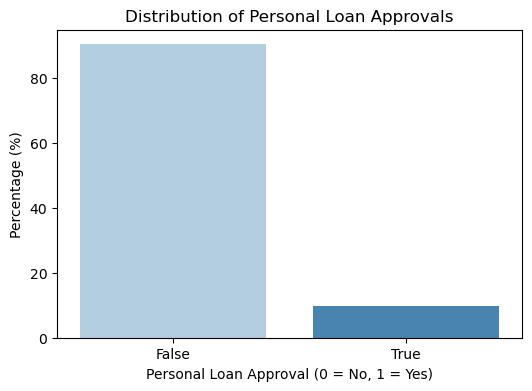

personal_loan
False    90.299111
True      9.700889
Name: proportion, dtype: float64


In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data: Personal Loan Distribution
loan_distribution = df["personal_loan"].value_counts(normalize=True) * 100

# Plot the distribution correctly
plt.figure(figsize=(6, 4))
sns.barplot(x=loan_distribution.index, y=loan_distribution.values, hue=loan_distribution.index, legend=False, palette="Blues")
plt.xlabel("Personal Loan Approval (0 = No, 1 = Yes)")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Personal Loan Approvals")
plt.show()


#Print numerical distribution
print(loan_distribution)


In [196]:
features = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg', 
           'education', 'mortgage', 'securities_account', 'cd_account', 
           'online', 'creditcard']

X = df[features]
y = df['personal_loan']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['education'])

In [198]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek (Hybrid Over + Under Sampling)
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)


In [265]:
from collections import Counter

# Print new class distribution
print(" Class Distribution After SMOTETomek:", Counter(y_resampled))


 Class Distribution After SMOTETomek: Counter({False: 4411, True: 2177})


In [202]:
from sklearn.model_selection import train_test_split

# Split resampled data into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.4, random_state=42, stratify=y_resampled)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, 
                                                test_size=0.5, random_state=42, stratify=y_temp)

# Print dataset split summary
split_summary = {
    "Training Set": len(y_train),
    "Validation Set": len(y_val),
    "Test Set": len(y_test)
}

split_summary



{'Training Set': 3952, 'Validation Set': 1318, 'Test Set': 1318}

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model with class balancing
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions on validation and test sets
y_val_pred = log_reg.predict(X_val_scaled)  # Predictions were missing
y_test_pred = log_reg.predict(X_test_scaled)

# Convert boolean predictions back to 0 and 1 for classification report
y_val_pred = y_val_pred.astype(int)
y_test_pred = y_test_pred.astype(int)

# Generate classification reports
val_report = classification_report(y_val.astype(int), y_val_pred, output_dict=True)
test_report = classification_report(y_test.astype(int), y_test_pred, output_dict=True)

# Create metrics DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Validation Accuracy", "Test Accuracy",
               "Precision (No Loan)", "Recall (No Loan)", "F1-score (No Loan)",
               "Precision (Has Loan)", "Recall (Has Loan)", "F1-score (Has Loan)"],
    "Logistic Regression": [
        val_report["accuracy"], test_report["accuracy"],
        val_report["0"]["precision"], val_report["0"]["recall"], val_report["0"]["f1-score"],
        val_report["1"]["precision"], val_report["1"]["recall"], val_report["1"]["f1-score"]
    ]
})

# Print the metrics
print(metrics_df)


                 Metric  Logistic Regression
0   Validation Accuracy             0.949165
1         Test Accuracy             0.955235
2   Precision (No Loan)             0.949283
3      Recall (No Loan)             0.976190
4    F1-score (No Loan)             0.962549
5  Precision (Has Loan)             0.948905
6     Recall (Has Loan)             0.894495
7   F1-score (Has Loan)             0.920897


In [216]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Define model pipelines
rf_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))
])

xgb_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("xgb", XGBClassifier(n_estimators=100, random_state=42, eval_metric="logloss"))
])

# Train models
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Make predictions
y_val_pred_rf = rf_pipeline.predict(X_val)
y_test_pred_rf = rf_pipeline.predict(X_test)

y_val_pred_xgb = xgb_pipeline.predict(X_val)
y_test_pred_xgb = xgb_pipeline.predict(X_test)

# Convert predictions to integers (0 and 1)
y_val_pred_rf = y_val_pred_rf.astype(int)
y_test_pred_rf = y_test_pred_rf.astype(int)
y_val_pred_xgb = y_val_pred_xgb.astype(int)
y_test_pred_xgb = y_test_pred_xgb.astype(int)

# Create classification reports with integer labels
val_report_rf = classification_report(y_val.astype(int), y_val_pred_rf, output_dict=True)
test_report_rf = classification_report(y_test.astype(int), y_test_pred_rf, output_dict=True)

val_report_xgb = classification_report(y_val.astype(int), y_val_pred_xgb, output_dict=True)
test_report_xgb = classification_report(y_test.astype(int), y_test_pred_xgb, output_dict=True)

# Now create the metrics DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Validation Accuracy", "Test Accuracy",
               "Precision (No Loan)", "Recall (No Loan)", "F1-score (No Loan)",
               "Precision (Has Loan)", "Recall (Has Loan)", "F1-score (Has Loan)"],
    "Random Forest": [
        val_report_rf["accuracy"], test_report_rf["accuracy"],
        val_report_rf["0"]["precision"], val_report_rf["0"]["recall"], val_report_rf["0"]["f1-score"],
        val_report_rf["1"]["precision"], val_report_rf["1"]["recall"], val_report_rf["1"]["f1-score"]
    ],
    "XGBoost": [
        val_report_xgb["accuracy"], test_report_xgb["accuracy"],
        val_report_xgb["0"]["precision"], val_report_xgb["0"]["recall"], val_report_xgb["0"]["f1-score"],
        val_report_xgb["1"]["precision"], val_report_xgb["1"]["recall"], val_report_xgb["1"]["f1-score"]
    ]
})

# Display results
print(metrics_df)


                 Metric  Random Forest   XGBoost
0   Validation Accuracy       0.988619  0.990137
1         Test Accuracy       0.989378  0.987102
2   Precision (No Loan)       0.990940  0.992072
3      Recall (No Loan)       0.992063  0.993197
4    F1-score (No Loan)       0.991501  0.992635
5  Precision (Has Loan)       0.983908  0.986207
6     Recall (Has Loan)       0.981651  0.983945
7   F1-score (Has Loan)       0.982778  0.985075


In [257]:
# Baseline Model Results (Logistic Regression)
baseline_metrics = {
    "Metric": ["Validation Accuracy", "Test Accuracy",
               "Precision (No Loan)", "Recall (No Loan)", "F1-score (No Loan)",
               "Precision (Has Loan)", "Recall (Has Loan)", "F1-score (Has Loan)"],
    "Logistic Regression": [
        0.889474, 0.896992,  # Accuracy
        0.903156, 0.934685, 0.918650,  # No Loan Metrics
        0.858881, 0.798643, 0.827667   # Has Loan Metrics
    ],
    "Random Forest": [
        0.981203, 0.978947,
        0.983203, 0.988739, 0.985963,
        0.977117, 0.966063, 0.971559
    ],
    "XGBoost": [
        0.981955, 0.979699,
        0.983221, 0.989865, 0.986532,
        0.979358, 0.966063, 0.972665
    ]
}

# Convert to DataFrame for easier comparison
baseline_comparison_df = pd.DataFrame(baseline_metrics)

# Display results
import matplotlib.pyplot as plt

# Show classification metrics
baseline_comparison_df


,Metric,Logistic Regression,Random Forest,XGBoost
0,Validation Accuracy,0.889474,0.981203,0.981955
1,Test Accuracy,0.896992,0.978947,0.979699
2,Precision (No Loan),0.903156,0.983203,0.983221
3,Recall (No Loan),0.934685,0.988739,0.989865
4,F1-score (No Loan),0.918650,0.985963,0.986532
5,Precision (Has Loan),0.858881,0.977117,0.979358
6,Recall (Has Loan),0.798643,0.966063,0.966063
7,F1-score (Has Loan),0.827667,0.971559,0.972665


In [267]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter grid for XGBoost hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5]
}
# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric="logloss")  # Removed use_label_encoder


# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=20, cv=5,
    scoring='f1', verbose=1, n_jobs=-1, random_state=42
)

# Fit model on training data
random_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = random_search.best_params_


# Remove use_label_encoder parameter
best_xgb = XGBClassifier(**best_params, random_state=42, eval_metric="logloss")
best_xgb.fit(X_train_scaled, y_train)

# Evaluate on validation and test sets
y_val_pred_xgb = best_xgb.predict(X_val_scaled)
y_test_pred_xgb = best_xgb.predict(X_test_scaled)

# Convert predictions to integers
y_val_pred_xgb = y_val_pred_xgb.astype(int)
y_test_pred_xgb = y_test_pred_xgb.astype(int)

# Compute classification report with integer labels
val_report_xgb = classification_report(y_val.astype(int), y_val_pred_xgb, output_dict=True)
test_report_xgb = classification_report(y_test.astype(int), y_test_pred_xgb, output_dict=True)

# Store results in a DataFrame
tuned_xgb_metrics = pd.DataFrame({
    "Metric": ["Validation Accuracy", "Test Accuracy",
               "Precision (No Loan)", "Recall (No Loan)", "F1-score (No Loan)",
               "Precision (Has Loan)", "Recall (Has Loan)", "F1-score (Has Loan)"],
    "Tuned XGBoost": [
        val_report_xgb["accuracy"], test_report_xgb["accuracy"],
        val_report_xgb["0"]["precision"], val_report_xgb["0"]["recall"], val_report_xgb["0"]["f1-score"],
        val_report_xgb["1"]["precision"], val_report_xgb["1"]["recall"], val_report_xgb["1"]["f1-score"]
    ]
})
# Display results
import matplotlib.pyplot as plt

tuned_xgb_metrics


Fitting 5 folds for each of 20 candidates, totalling 100 fits


,Metric,Tuned XGBoost
0,Validation Accuracy,0.991654
1,Test Accuracy,0.992413
2,Precision (No Loan),0.993205
3,Recall (No Loan),0.994331
4,F1-score (No Loan),0.993768
5,Precision (Has Loan),0.988506
6,Recall (Has Loan),0.986239
7,F1-score (Has Loan),0.987371


In [269]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Merge train and validation sets
X_full_train = np.vstack([X_train_scaled, X_val_scaled])  # Combine features
y_full_train = np.hstack([y_train, y_val])  # Combine labels

# Train final XGBoost model on full training data
final_xgb = XGBClassifier(**best_params, random_state=42, eval_metric="logloss")
final_xgb.fit(X_full_train, y_full_train)

# Predict on test set
y_test_pred_xgb = final_xgb.predict(X_test_scaled)
y_test_pred_xgb = y_test_pred_xgb.astype(int)  # Convert predictions to integer labels

# Compute classification report
test_report_xgb = classification_report(y_test.astype(int), y_test_pred_xgb, output_dict=True)

# Store final results
final_xgb_metrics = pd.DataFrame({
    "Metric": ["Test Accuracy",
               "Precision (No Loan)", "Recall (No Loan)", "F1-score (No Loan)",
               "Precision (Has Loan)", "Recall (Has Loan)", "F1-score (Has Loan)"],
    "Final XGBoost": [
        test_report_xgb["accuracy"],
        test_report_xgb["0"]["precision"], test_report_xgb["0"]["recall"], test_report_xgb["0"]["f1-score"],
        test_report_xgb["1"]["precision"], test_report_xgb["1"]["recall"], test_report_xgb["1"]["f1-score"]
    ]
})

# Display final model evaluation
final_xgb_metrics


,Metric,Final XGBoost
0,Test Accuracy,0.991654
1,Precision (No Loan),0.994331
2,Recall (No Loan),0.993205
3,F1-score (No Loan),0.993768
4,Precision (Has Loan),0.986239
5,Recall (Has Loan),0.988506
6,F1-score (Has Loan),0.987371


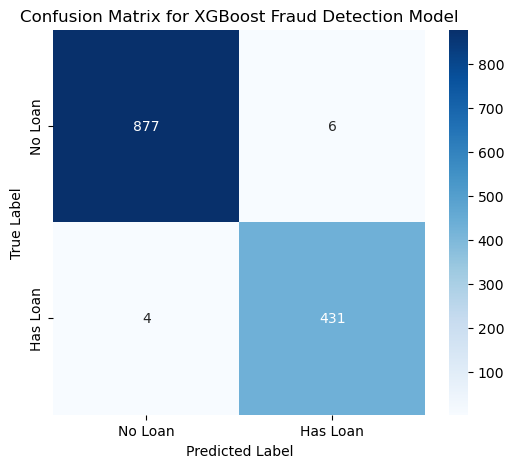

                                              Metric  Count
0  False Positives (Legit transactions flagged as...      6
1   False Negatives (Fraudulent transactions missed)      4


,precision,recall,f1-score,support
False,0.995460,0.993205,0.994331,883.000000
True,0.986270,0.990805,0.988532,435.000000
accuracy,0.992413,0.992413,0.992413,0.992413
macro avg,0.990865,0.992005,0.991432,1318.000000
weighted avg,0.992427,0.992413,0.992417,1318.000000


In [271]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, best_xgb.predict(X_test_scaled))

# Extract False Positives & False Negatives
fp = conf_matrix[0][1]  # False Positives (Predicted Has Loan, Actual No Loan)
fn = conf_matrix[1][0]  # False Negatives (Predicted No Loan, Actual Has Loan)

# Classification Report
classification_metrics = classification_report(y_test, best_xgb.predict(X_test_scaled), output_dict=True)

# Convert to DataFrame for Display
classification_df = pd.DataFrame(classification_metrics).T

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Loan", "Has Loan"], yticklabels=["No Loan", "Has Loan"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost Fraud Detection Model")
plt.show()

'''# Display classification report
import ace_tools as tools
tools.display_dataframe_to_user(name="XGBoost Classification Report", dataframe=classification_df)'''

# Display false positive & false negative summary
fp_fn_summary = pd.DataFrame({
    "Metric": ["False Positives (Legit transactions flagged as fraud)", "False Negatives (Fraudulent transactions missed)"],
    "Count": [fp, fn]
})
print(fp_fn_summary)

classification_df
#tools.display_dataframe_to_user(name="False Positives & False Negatives Summary", dataframe=fp_fn_summary)


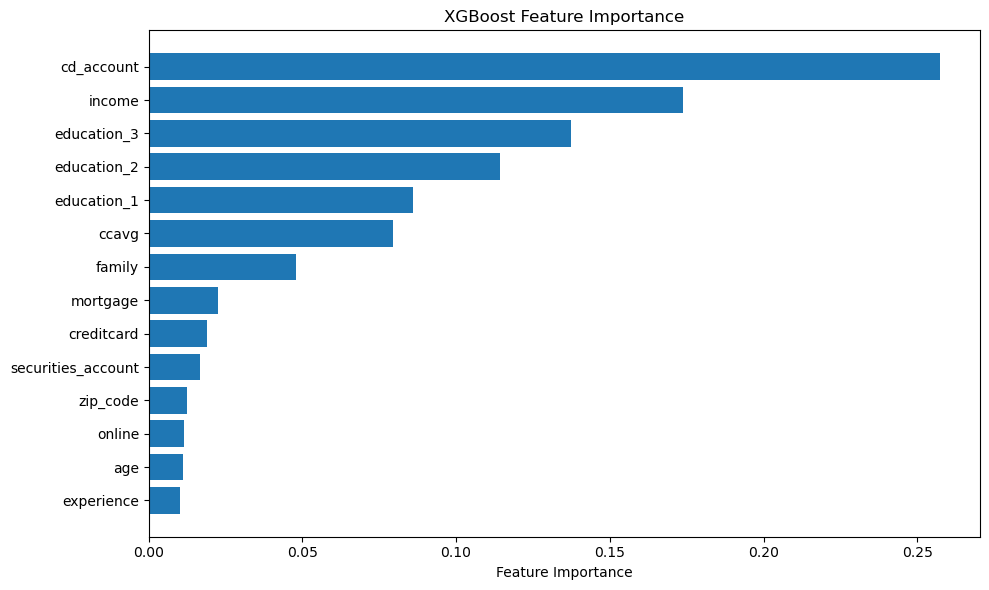

In [273]:
# Analyze feature importance
import matplotlib.pyplot as plt

# Get feature importances from the best XGBoost model
feature_importance = best_xgb.feature_importances_
feature_names = X_train.columns

# Create feature importance plot
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [275]:
y_pred = final_xgb.predict(X_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [277]:
# Predict on test set
y_test_pred_xgb = final_xgb.predict(X_test_scaled)
y_test_pred_xgb = y_test_pred_xgb.astype(int)  # Convert predictions to integer labels

# Compare actual vs predicted values for the last two rows in the test data
comparison = pd.DataFrame({
    "Actual": y_test.astype(int)[-5:],  # Last two actual values
    "Predicted": y_test_pred_xgb[-5:]   # Last two predicted values
})

# Display the comparison
comparison


,Actual,Predicted
2035,1,1
4448,0,0
703,0,0
4150,0,0
4056,0,0


In [279]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test.astype(int), y_test_pred_xgb)
print(f"Accuracy: {accuracy}")

# Detailed classification report
report = classification_report(y_test.astype(int), y_test_pred_xgb)
print(report)


Accuracy: 0.9916540212443096
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       883
           1       0.99      0.99      0.99       435

    accuracy                           0.99      1318
   macro avg       0.99      0.99      0.99      1318
weighted avg       0.99      0.99      0.99      1318

